<a href="https://colab.research.google.com/github/pradhicsha6/Cotton-Disease-Prediction-Deep-Learning/blob/master/Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/summer_project/Dataset_RGB/Training_80%'
valid_path = '/content/drive/MyDrive/summer_project/Dataset_RGB/Test_10%'

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/summer_project/Dataset_RGB/Training_80%/*')

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)


model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/summer_project/Dataset_RGB/Training_80%',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4473 images belonging to 6 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/summer_project/Dataset_RGB/Test_10%',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 559 images belonging to 6 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=20,
  validation_steps=20
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
140/140 [==============================] - 1015s 7s/step - loss: 1.6216 - accuracy: 0.5477 - val_loss: 0.9530 - val_accuracy: 0.6780
Epoch 2/20
140/140 [==============================] - 739s 5s/step - loss: 0.8104 - accuracy: 0.7299 - val_loss: 0.7952 - val_accuracy: 0.7066
Epoch 3/20
140/140 [==============================] - 757s 5s/step - loss: 0.7143 - accuracy: 0.7527 - val_loss: 0.6162 - val_accuracy: 0.7818
Epoch 4/20
140/140 [==============================] - 735s 5s/step - loss: 0.7233 - accuracy: 0.7603 - val_loss: 0.5502 - val_accuracy: 0.7925
Epoch 5/20
140/140 [==============================] - 742s 5s/step - loss: 0.7185 - accuracy: 0.7610 - val_loss: 0.5203 - val_accuracy: 0.7996
Epoch 6/20
140/140 [==============================] - 801s 6s/step - loss: 0.6451 - accuracy: 0.7843 - val_loss: 1.0432 - val_accuracy: 0.6995
Epoch 7/20
140/140 [==============================] - 793s 6s/step - loss: 0.7604 - accuracy: 0.7749 - val_loss: 0.3826 - val_accuracy: 0.855

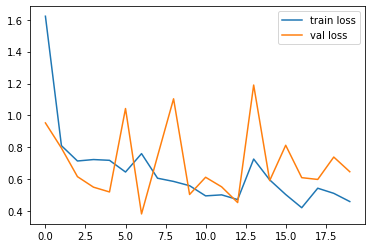

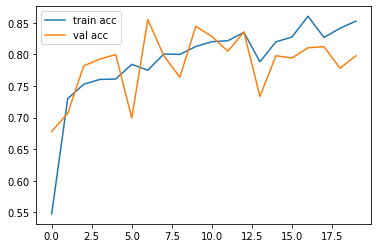

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
np.mean(r.history['val_accuracy'])


0.7855992794036866

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
